# import data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# load data

In [2]:
medical_df=pd.read_csv('C:\\Users\\santu\\OneDrive\\Desktop\\PROJECT FLIP ROBO\\medical_cost_insurance.csv')
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# EXPLORE DATA

In [3]:
medical_df.shape

(1338, 7)

In [4]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# DATA VISULISATION

C:\Users\santu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 300x300 with 0 Axes>

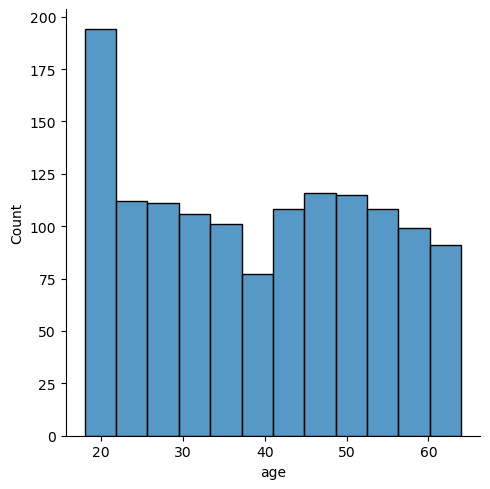

In [6]:
plt.figure(figsize=(3,3))
sns.displot(data=medical_df,x='age')


C:\Users\santu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


sex
male      676
female    662
Name: count, dtype: int64

<Figure size 300x300 with 0 Axes>

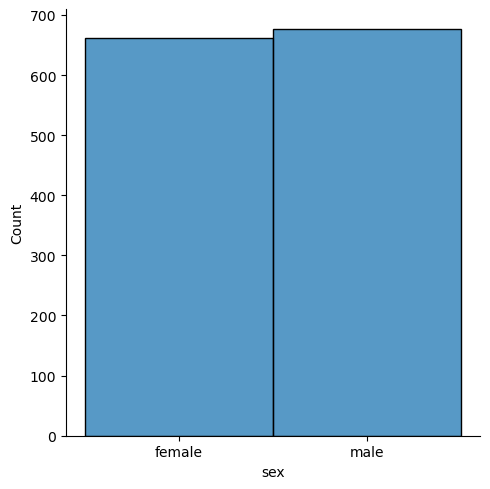

In [7]:
plt.figure(figsize=(3,3))
sns.displot(data=medical_df,x='sex',kind='hist')
medical_df['sex'].value_counts()

C:\Users\santu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


bmi
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: count, Length: 548, dtype: int64

<Figure size 400x400 with 0 Axes>

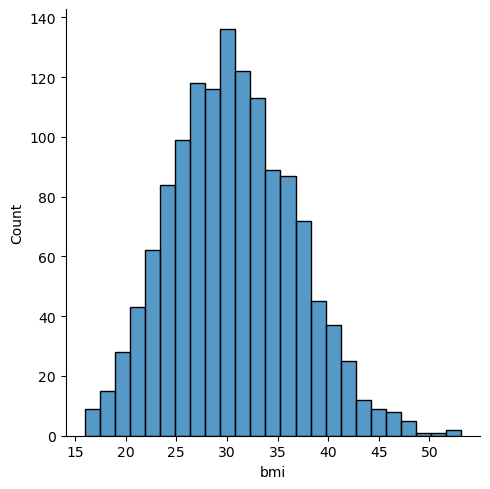

In [8]:
plt.figure(figsize=(4,4))
sns.displot(data=medical_df,x='bmi')
medical_df['bmi'].value_counts()

C:\Users\santu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

<Figure size 400x400 with 0 Axes>

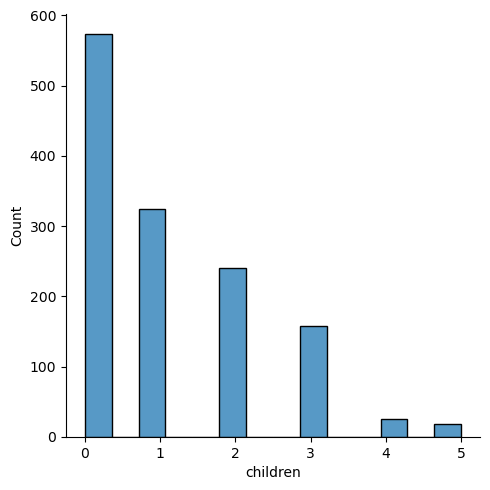

In [9]:
plt.figure(figsize=(4,4))
sns.displot(data=medical_df,x='children')
medical_df['children'].value_counts()

C:\Users\santu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


smoker
no     1064
yes     274
Name: count, dtype: int64

<Figure size 400x400 with 0 Axes>

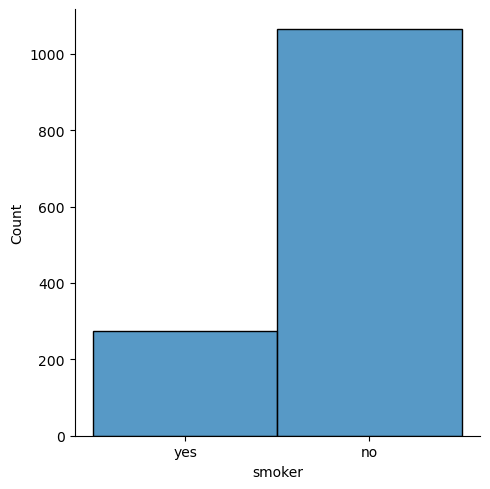

In [10]:
plt.figure(figsize=(4,4))
sns.displot(data=medical_df,x='smoker')
medical_df['smoker'].value_counts()

C:\Users\santu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

<Figure size 400x400 with 0 Axes>

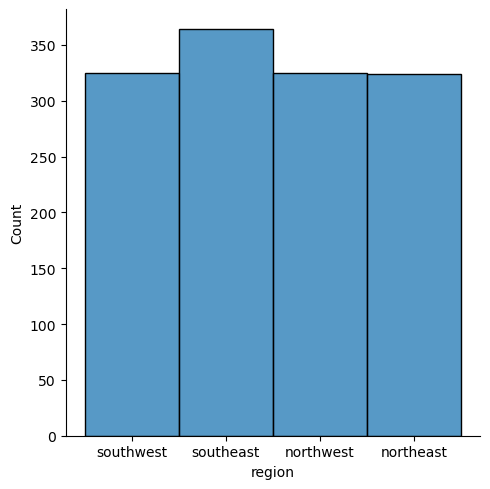

In [11]:
plt.figure(figsize=(4,4))
sns.displot(data=medical_df,x='region')
medical_df['region'].value_counts()

C:\Users\santu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


charges
1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: count, Length: 1337, dtype: int64

<Figure size 400x400 with 0 Axes>

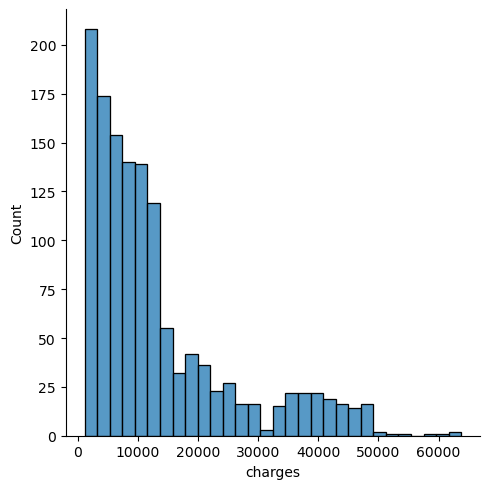

In [12]:
plt.figure(figsize=(4,4))
sns.displot(data=medical_df,x='charges')
medical_df['charges'].value_counts()

# convert categorical columns to numerical

In [13]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
medical_df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [15]:
medical_df.replace({'sex':{'male':0,'female':1,}},inplace=True)
medical_df.replace({'smoker':{'yes':0,'no':1,}},inplace=True)
medical_df.replace({'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3}},inplace=True)

In [16]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


# TRAIN AND TEST

In [17]:
x=medical_df.drop('charges',axis=1)
y=medical_df['charges']

In [18]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.1, random_state=2)

In [19]:
x_train.shape

(1204, 6)

In [20]:
x_test.shape

(134, 6)

In [21]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,2
4,32,0,28.880,0,1,2
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,2
1334,18,1,31.920,0,1,3
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [22]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [25]:
lg=LinearRegression()
lg.fit(x_train,y_train)     #80 model will be train
y_pred=lg.predict(x_test)         #10 model will be predicted

In [24]:
r2_score(y_test,y_pred)

0.7058997983752826

In [30]:
input_df=(32,0,28.880,0,1,2)
np_df=np.array(input_df)
input_df_reshaped=np_df.reshape(1,-1)
prediction=lg.predict(input_df_reshaped)
print('Medical Insurance Is:',prediction)

Medical Insurance Is: [5459.71569296]


C:\Users\santu\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
